In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
df = pd.read_csv('onlinefoods.csv')

In [ ]:
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nMissing values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(

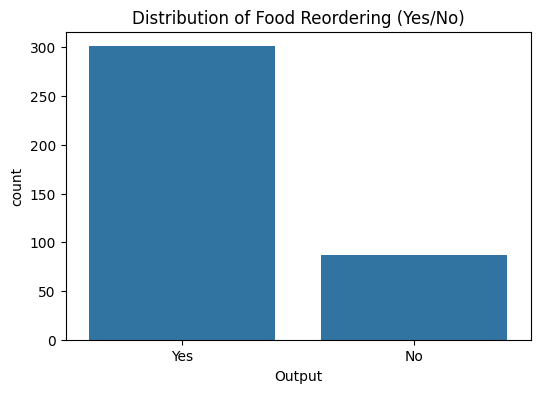

In [ ]:
# Visualize the distribution of the target variable 'Output'
plt.figure(figsize=(6, 4))
sns.countplot(x='Output', data=df)
plt.title('Distribution of Food Reordering (Yes/No)')
plt.show()


In [ ]:
# Encode categorical variables (convert text to numbers)
le = LabelEncoder()
categorical_cols = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 
                    'Educational Qualifications', 'Feedback', 'Output']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
# Select features and target
X = df[['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income', 
        'Educational Qualifications', 'Family size', 'Feedback']]
y = df['Output']


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a simple Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)


Model Accuracy: 0.8589743589743589


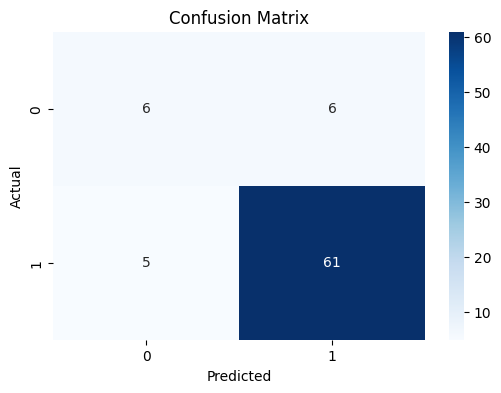

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# Feature Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
print("\nFeature Coefficients (Impact on Prediction):")
print(coefficients)


Feature Coefficients (Impact on Prediction):
                      Feature  Coefficient
7                    Feedback     2.875981
2              Marital Status     0.456501
1                      Gender     0.298004
5  Educational Qualifications     0.229549
4              Monthly Income     0.114231
6                 Family size    -0.002058
0                         Age    -0.051099
3                  Occupation    -0.110962


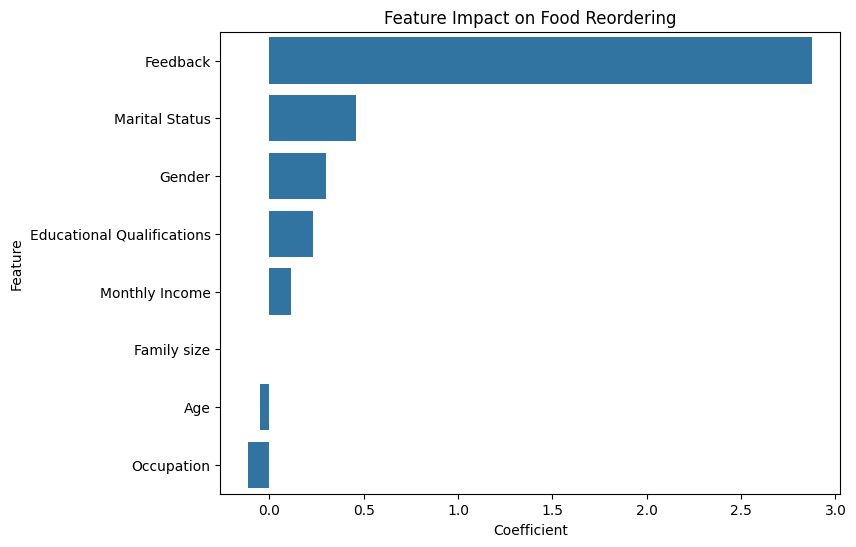

In [ ]:
# Visualize Feature Coefficients
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Impact on Food Reordering')
plt.show()